In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_excel(r"C:\Users\huzai\OneDrive\Desktop\national_categories.xlsx")

df

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
...,...,...,...,...,...,...,...,...
817389,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Unplanned Clinical Activity,12,2022-06
817390,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinics,4,2022-06
817391,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,Planned Clinical Procedure,92,2022-06
817392,2022-06-30,E54000054,NHS West Yorkshire ICB - X2C4Y,Extended Access Provision,Care Related Encounter,General Consultation Routine,4,2022-06


In [31]:

df['appointment_month'] = df['appointment_month'].astype(str)


In [32]:
nc_ss = pd.DataFrame()
nc_ss = df.groupby(['appointment_month', 'service_setting']).size().reset_index(name='total_appointments')
print(nc_ss)


   appointment_month            service_setting  total_appointments
0            2021-08  Extended Access Provision                9023
1            2021-08           General Practice               31381
2            2021-08                      Other               12294
3            2021-08       Primary Care Network               14773
4            2021-08                   Unmapped                2528
5            2021-09  Extended Access Provision                9707
6            2021-09           General Practice               33477
7            2021-09                      Other               13098
8            2021-09       Primary Care Network               15964
9            2021-09                   Unmapped                2676
10           2021-10  Extended Access Provision                9653
11           2021-10           General Practice               33327
12           2021-10                      Other               12730
13           2021-10       Primary Care Network 

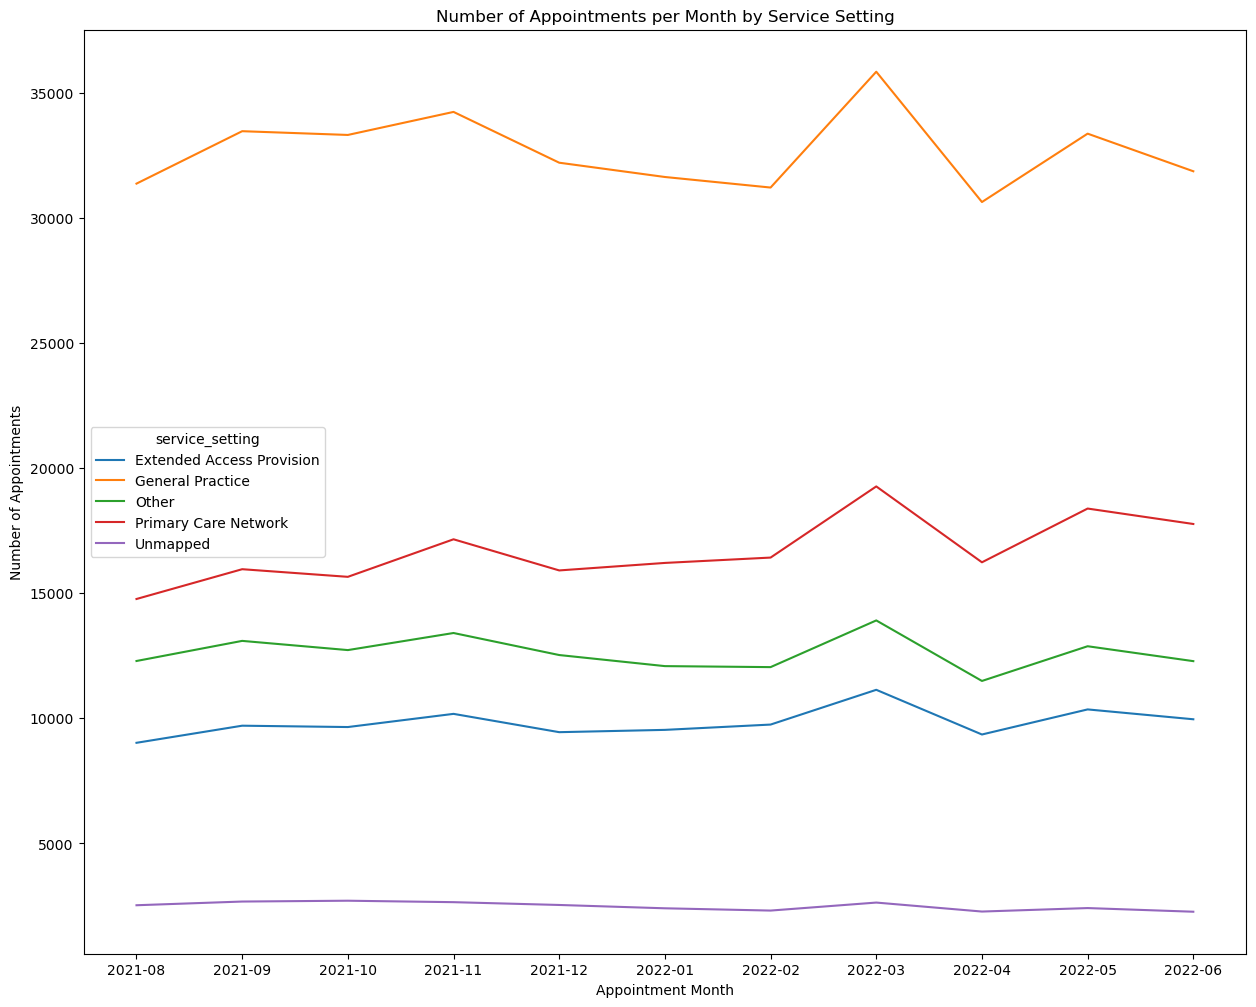

In [33]:
plt.figure(figsize=(15, 12))

x = 'appointment_month'
y = 'total_appointments'

hue = 'service_setting'
data = nc_ss


sns.lineplot(x=x, y=y, hue=hue, data=data, ci=None)


plt.title('Number of Appointments per Month by Service Setting')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Show the plot
plt.show()


In [38]:

nc_ct = pd.DataFrame()


nc_ct = df.groupby(['appointment_month', 'context_type']).size().reset_index(name='total_appointments')

print(nc_ct)


   appointment_month            context_type  total_appointments
0            2021-08  Care Related Encounter               59604
1            2021-08    Inconsistent Mapping                7867
2            2021-08                Unmapped                2528
3            2021-09  Care Related Encounter               63830
4            2021-09    Inconsistent Mapping                8416
5            2021-09                Unmapped                2676
6            2021-10  Care Related Encounter               62937
7            2021-10    Inconsistent Mapping                8432
8            2021-10                Unmapped                2709
9            2021-11  Care Related Encounter               66452
10           2021-11    Inconsistent Mapping                8549
11           2021-11                Unmapped                2651
12           2021-12  Care Related Encounter               62084
13           2021-12    Inconsistent Mapping                8028
14           2021-12     

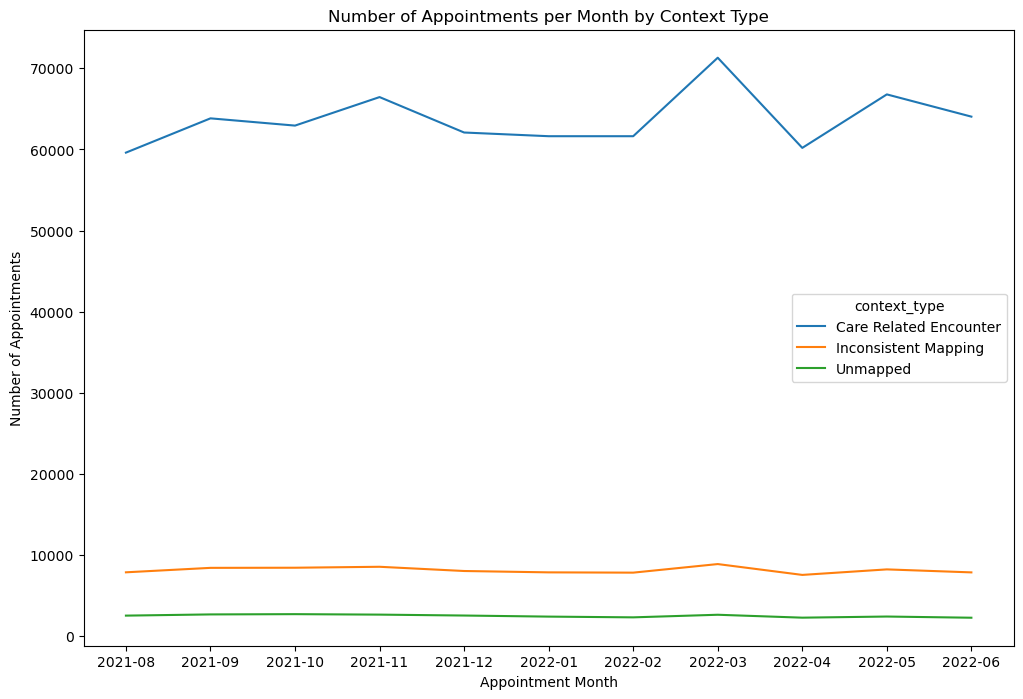

In [39]:
plt.figure(figsize=(12, 8))


x_ct = 'appointment_month'
y_ct = 'total_appointments'


hue_ct = 'context_type'
data_ct = nc_ct

sns.lineplot(x=x_ct, y=y_ct, hue=hue_ct, data=data_ct, ci=None)


plt.title('Number of Appointments per Month by Context Type')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

plt.show()


In [40]:

nc_nc = pd.DataFrame()

nc_nc = df.groupby(['appointment_month', 'national_category']).size().reset_index(name='total_appointments')


print(nc_nc)


    appointment_month                                  national_category  \
0             2021-08  Care Home Needs Assessment & Personalised Care...   
1             2021-08                                    Care Home Visit   
2             2021-08                                    Clinical Triage   
3             2021-08                         General Consultation Acute   
4             2021-08                       General Consultation Routine   
..                ...                                                ...   
193           2022-06                         Social Prescribing Service   
194           2022-06                       Structured Medication Review   
195           2022-06                                           Unmapped   
196           2022-06                        Unplanned Clinical Activity   
197           2022-06                                            Walk-in   

     total_appointments  
0                  2014  
1                  2224  
2        

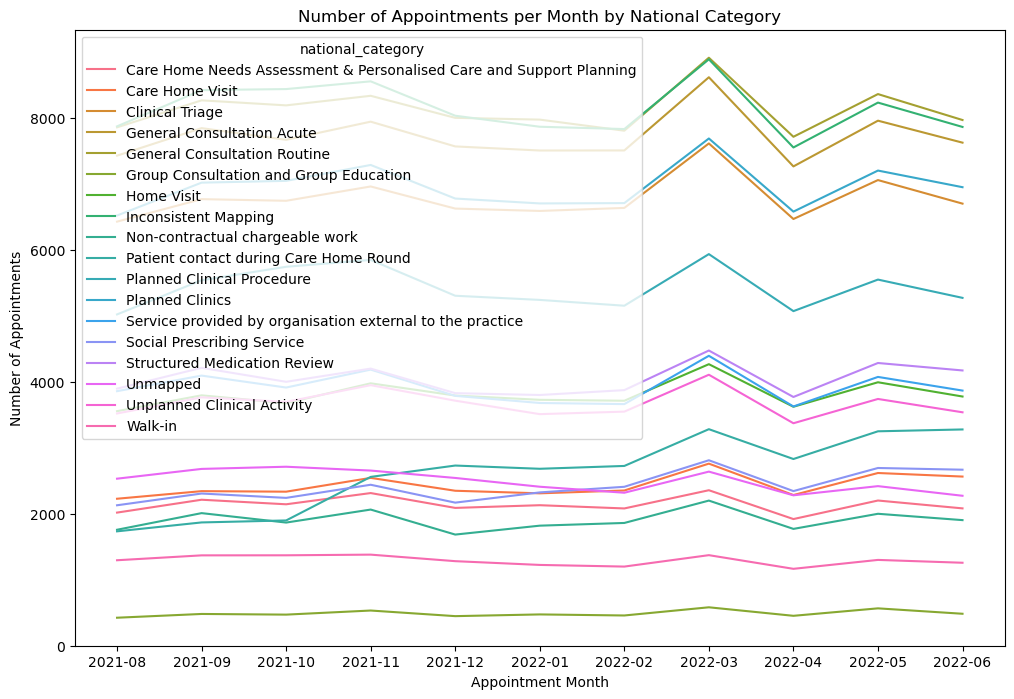

In [41]:
plt.figure(figsize=(15, 12))


x_nc = 'appointment_month'
y_nc = 'total_appointments'


hue_nc = 'national_category'
data_nc = nc_nc

sns.lineplot(x=x_nc, y=y_nc, hue=hue_nc, data=data_nc, ci=None)


plt.title('Number of Appointments per Month by National Category')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')


plt.show()


In [17]:
nc_ss_day=pd.DataFrame()
nc_ss_day = df.groupby(['appointment_date', 'appointment_month', 'service_setting']).size().reset_index(name='monthly_appointments')
nc_ss_day

,appointment_date,appointment_month,service_setting,monthly_appointments
0,2021-08-01,2021-08,Extended Access Provision,31
1,2021-08-01,2021-08,General Practice,152
2,2021-08-01,2021-08,Other,27
3,2021-08-01,2021-08,Primary Care Network,26
4,2021-08-01,2021-08,Unmapped,11
...,...,...,...,...
1665,2022-06-30,2022-06,Extended Access Provision,465
1666,2022-06-30,2022-06,General Practice,1443
1667,2022-06-30,2022-06,Other,582
1668,2022-06-30,2022-06,Primary Care Network,880


In [18]:
nc_ss_day['season'] = pd.to_datetime(nc_ss_day['appointment_month']).dt.strftime('%B')
season_appointments = nc_ss_day.groupby('season')['monthly_appointments'].sum().reset_index()
season_appointments

,season,monthly_appointments
0,April,70012
1,August,69999
2,December,72651
3,February,71769
4,January,71896
5,June,74168
6,March,82822
7,May,77425
8,November,77652
9,October,74078


In [19]:
print(season_appointments)


       season  monthly_appointments
0       April                 70012
1      August                 69999
2    December                 72651
3    February                 71769
4     January                 71896
5        June                 74168
6       March                 82822
7         May                 77425
8    November                 77652
9     October                 74078
10  September                 74922


<Figure size 1500x1200 with 0 Axes>

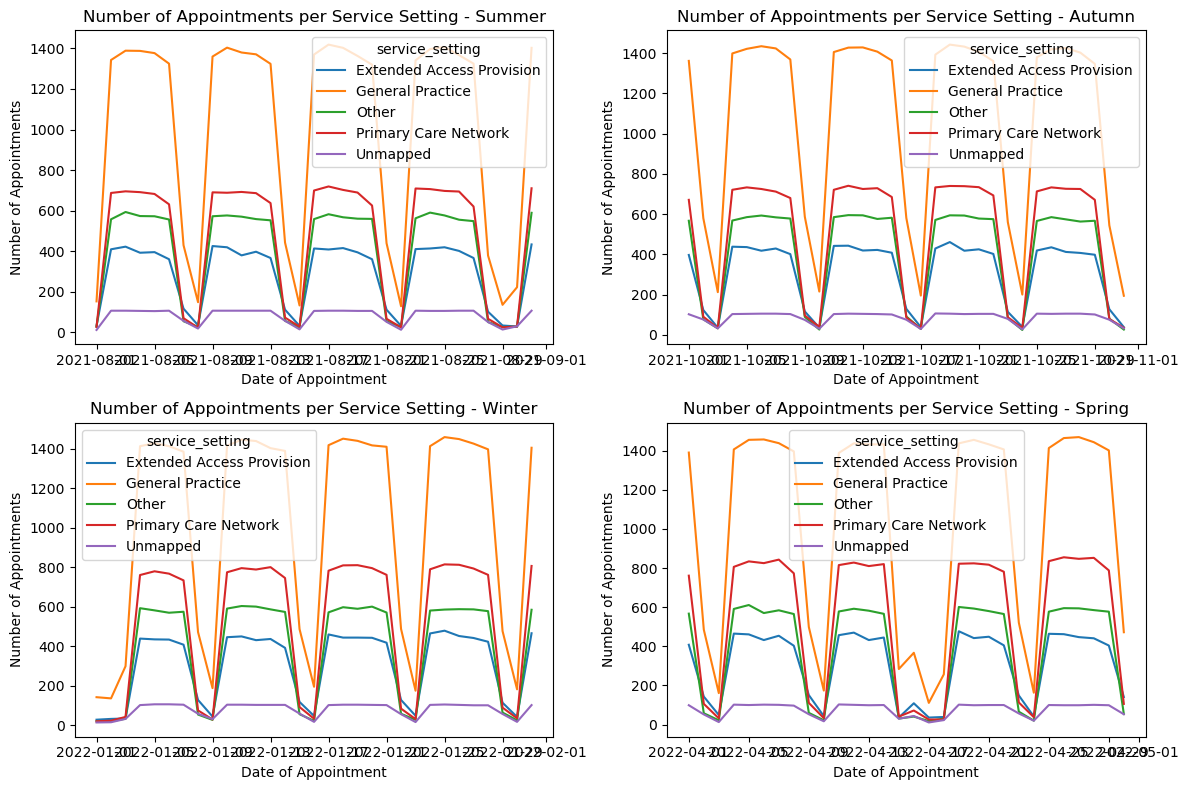

In [27]:

plt.figure(figsize=(15, 12))
summer = nc_ss_day[nc_ss_day['appointment_month'] == '2021-08']
autumn = nc_ss_day[nc_ss_day['appointment_month'] == '2021-10']
winter = nc_ss_day[nc_ss_day['appointment_month'] == '2022-01']
spring = nc_ss_day[nc_ss_day['appointment_month'] == '2022-04']


plt.figure(figsize=(12, 8))


plt.subplot(2, 2, 1)
sns.lineplot(data=summer, x='appointment_date', y='monthly_appointments', hue='service_setting', ci=None)
plt.xlabel('Date of Appointment')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments per Service Setting - Summer')


plt.subplot(2, 2, 2)
sns.lineplot(data=autumn, x='appointment_date', y='monthly_appointments', hue='service_setting', ci=None)
plt.xlabel('Date of Appointment')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments per Service Setting - Autumn')


plt.subplot(2, 2, 3)
sns.lineplot(data=winter, x='appointment_date', y='monthly_appointments', hue='service_setting', ci=None)
plt.xlabel('Date of Appointment')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments per Service Setting - Winter')


plt.subplot(2, 2, 4)
sns.lineplot(data=spring, x='appointment_date', y='monthly_appointments', hue='service_setting', ci=None)
plt.xlabel('Date of Appointment')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments per Service Setting - Spring')

plt.tight_layout()
plt.show()
